In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000,0
1,15810944,Male,35.0,20000,0
2,15668575,Female,26.0,43000,0
3,15603246,Female,27.0,57000,0
4,15804002,Male,19.0,76000,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000,1
396,15706071,Male,51.0,23000,1
397,15654296,Female,50.0,20000,1
398,15755018,Male,36.0,33000,0


# **EXPLORATORY DATA ANALYSIS**

In [3]:
df.info() #columns and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              391 non-null    float64
 3   EstimatedSalary  400 non-null    int64  
 4   Purchased        400 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 15.8+ KB


In [4]:
df.shape

(400, 5)

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000,0
1,15810944,Male,35.0,20000,0
2,15668575,Female,26.0,43000,0
3,15603246,Female,27.0,57000,0
4,15804002,Male,19.0,76000,0


In [6]:
df.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
84,15798659,Female,30.0,62000,0


In [7]:
df.loc[4]

User ID            15804002
Gender                 Male
Age                    19.0
EstimatedSalary       76000
Purchased                 0
Name: 4, dtype: object

In [8]:
df.describe() #statistical computations

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,391.000000,400.000000,400.000000
mean,1.569154e+07,37.746803,69742.500000,0.357500
std,7.165832e+04,10.480254,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,30.000000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
df.Gender.value_counts() #Total number of males and females

Female    204
Male      196
Name: Gender, dtype: int64

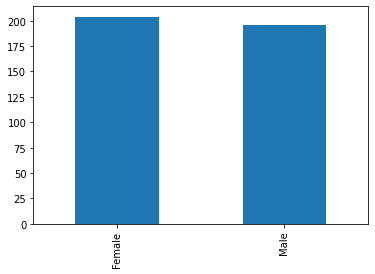

In [10]:
df.Gender.value_counts().plot(kind="bar");

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


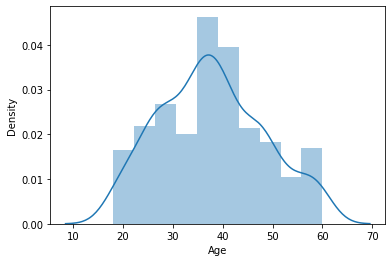

In [11]:
sns.distplot(df.Age)

In [12]:
df.isnull().sum() #To check if there are any missing values

User ID            0
Gender             0
Age                9
EstimatedSalary    0
Purchased          0
dtype: int64

In [13]:
df.duplicated().sum() #To check are there any duplicated values in the dataset

0

In [14]:
df.groupby(['Gender','Purchased'])['Purchased'].count().unstack() #Total number of males and females purchased 

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [15]:
pd.crosstab(index=df['EstimatedSalary'],columns='count').sort_values(['count'],ascending=False)  #Maximum number of users belong to which salary range

col_0,count
EstimatedSalary,
72000,12
80000,11
79000,10
75000,9
71000,9
...,...
120000,1
97000,1
123000,1


In [16]:
df.sort_values(by=['Age'],ascending = True) #sorting based on age

,User ID,Gender,Age,EstimatedSalary,Purchased
165,15578738,Female,18.0,86000,0
76,15746737,Male,18.0,52000,0
141,15666141,Female,18.0,68000,0
51,15764195,Female,18.0,44000,0
14,15628972,Male,18.0,82000,0
...,...,...,...,...,...
164,15697574,Female,NaN,69000,0
197,15680243,Female,NaN,36000,0
263,15767681,Female,NaN,72000,0
278,15613014,Female,NaN,38000,1


In [17]:
df.groupby('Purchased')['Age','EstimatedSalary'].mean() #Average age and estimated salary 

<ipython-input-17-86c0dfdbd6ac>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Purchased')['Age','EstimatedSalary'].mean() #Average age and estimated salary


,Age,EstimatedSalary
Purchased,,
0,32.876494,60544.747082
1,46.478571,86272.727273


# **DATA VISUALISATION**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [19]:
c=df.loc[df['Gender']=='Male']
d=c['Gender'][c['Purchased']==0].count()

f=c['Gender'][c['Purchased']==1].count()
h=df.loc[df['Gender']=='Female']
i=c['Gender'][c['Purchased']==0].count()

j=c['Gender'][c['Purchased']==1].count()

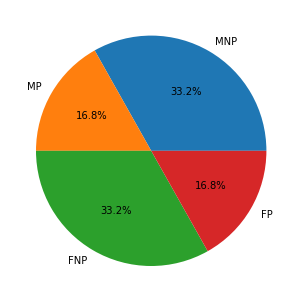

In [20]:
fig1 = plt.figure()
ax = fig1.add_axes([0,0,1,1])
languages = ['MNP','MP','FNP','FP']
people = [d,f,i,j]
ax.pie(people, labels=languages, autopct='%1.1f%%')
plt.show()

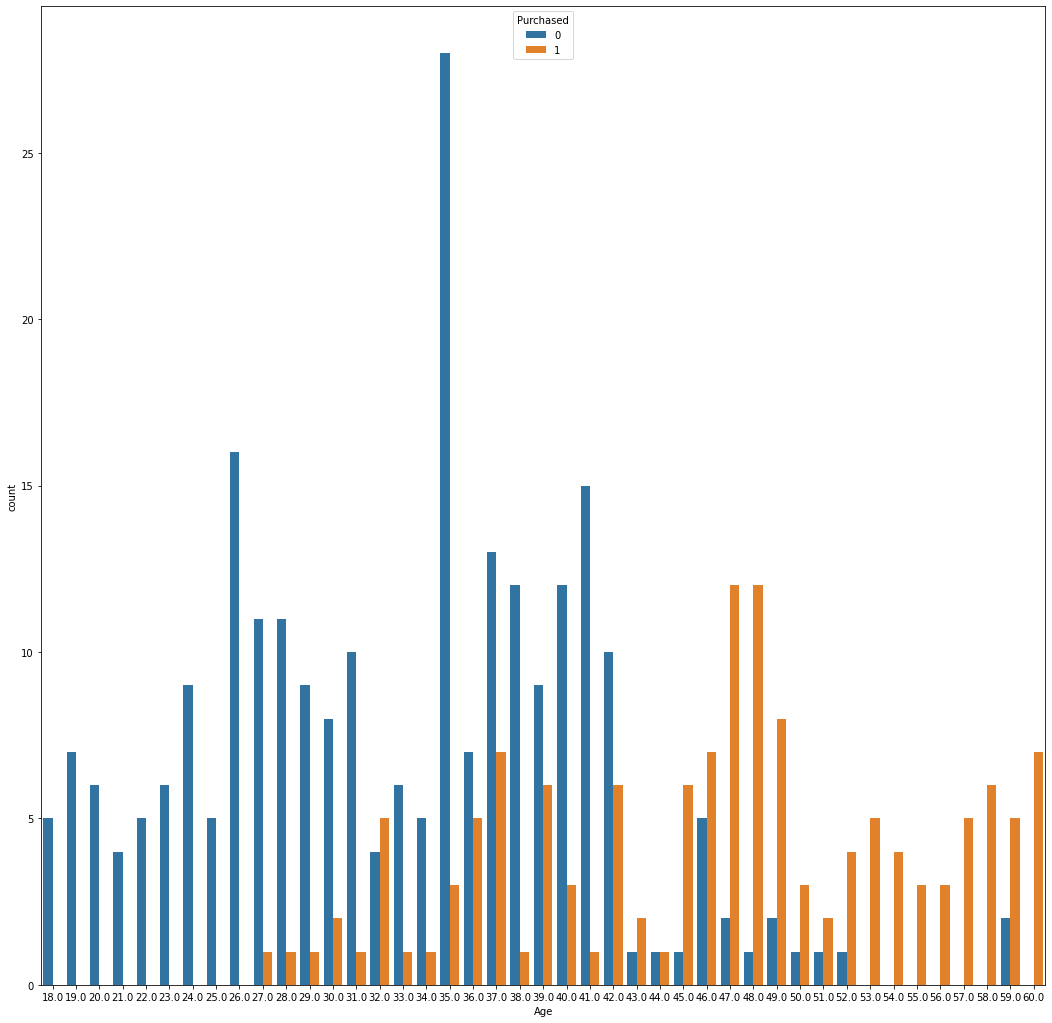

In [21]:
plt.figure(figsize = (18,18))
sns.countplot(x ='Age', hue = "Purchased", data = df) 

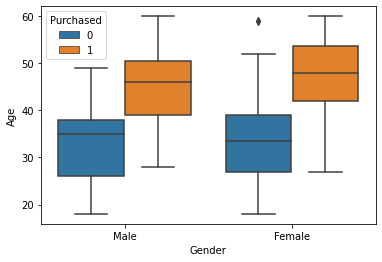

In [22]:
sns.boxplot(y='Age', x='Gender',data=df,hue='Purchased')

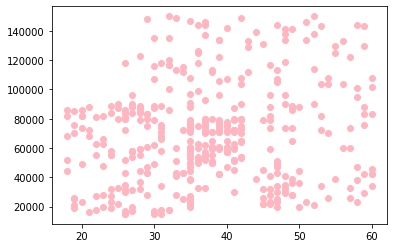

In [23]:
plt.scatter(df.Age,df.EstimatedSalary,color = 'lightpink')

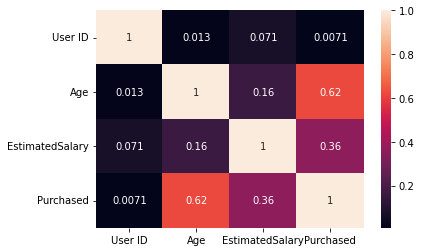

In [24]:
sns.heatmap(df.corr(),annot = True)

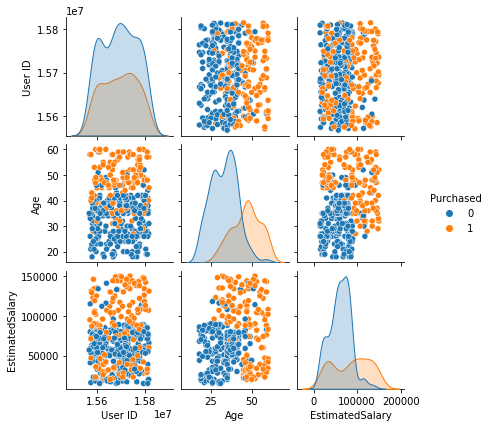

In [25]:
sns.pairplot(df, hue='Purchased', height=2)

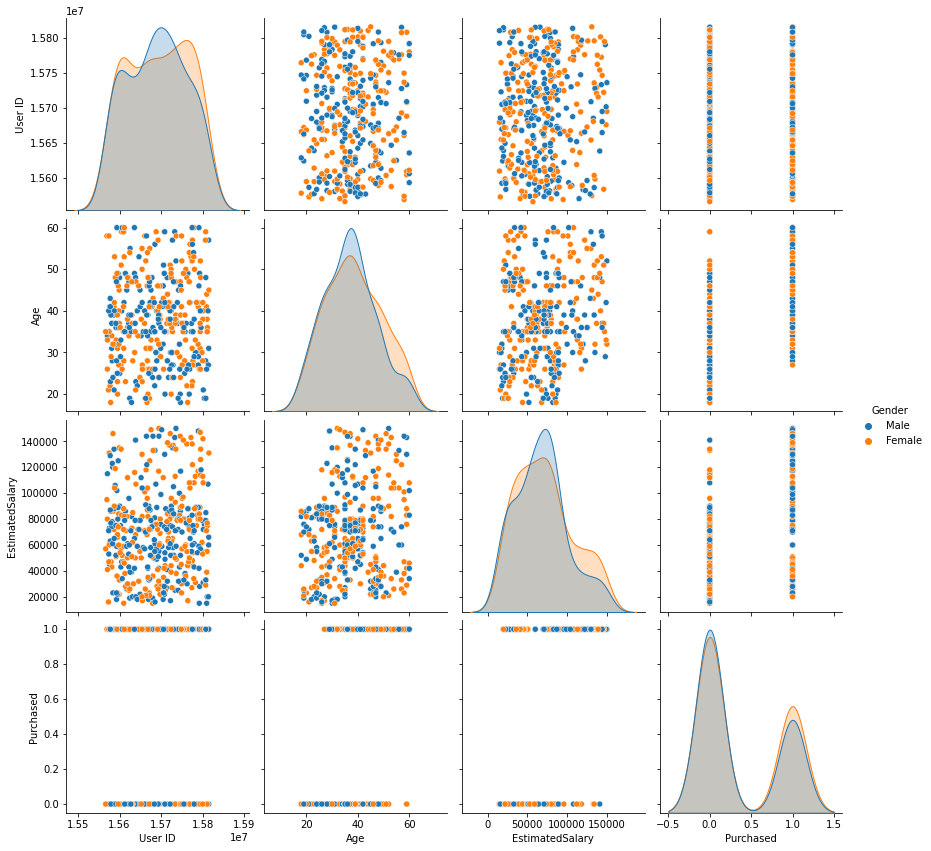

In [26]:
sns.pairplot(df, hue='Gender', height=3)

In [27]:
d1=df['Age'][df['Age']<25].count()
a=df.loc[df['Age']>=25]
b=df.loc[df['Age']<40]
c=b.merge(a)
c=c['Age'].count()
e=df.loc[df['Age']>=40].count()
e=df['Age'][df['Age']>=40].count()



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


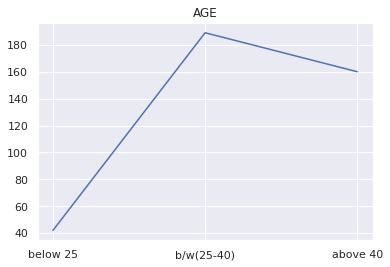

In [28]:
sns.set_theme(style="darkgrid")

x = ['below 25', 'b/w(25-40)', 'above 40',]
y = [d1,c,e]
plt.title("AGE")
sns.lineplot(x, y)
plt.show()

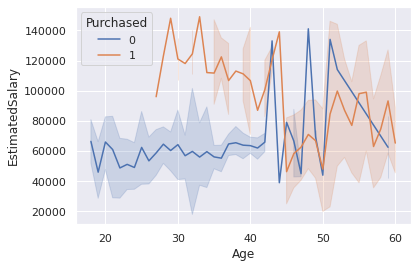

In [29]:
sns.lineplot(x="Age", y="EstimatedSalary", data=df, hue="Purchased")

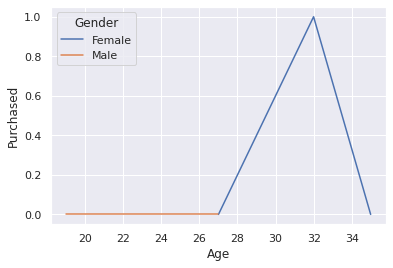

In [30]:
data = df.iloc[3:10, :] #selecting required rows and columns
sns.lineplot(x='Age',y='Purchased',data = data,hue='Gender')

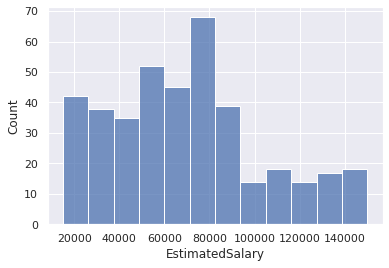

In [31]:
sns.histplot(x='EstimatedSalary', bins=12,data=df )
plt.show()

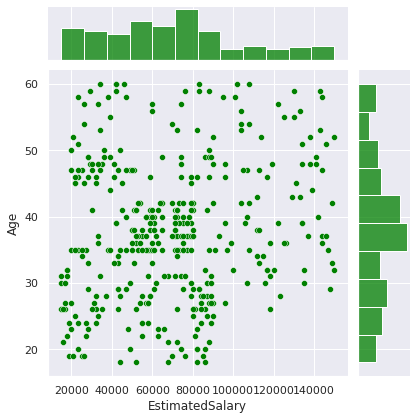

In [32]:


sns.jointplot(x='EstimatedSalary',y='Age',data = df,color='green')



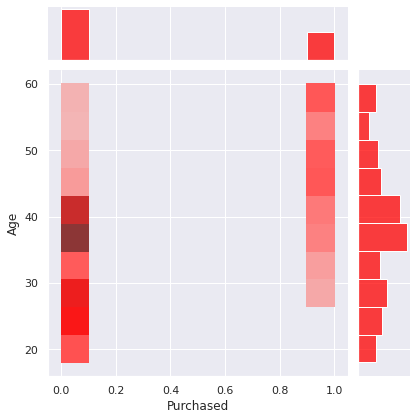

In [33]:
sns.jointplot(x='Purchased',y='Age',kind='hist',data = df,color='red')

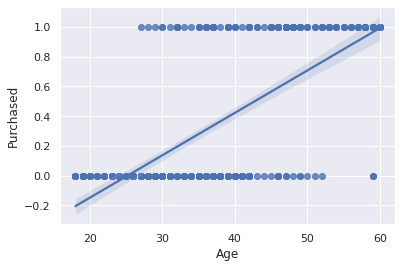

In [34]:
sns.regplot(x ='Age', y ='Purchased', data = df)

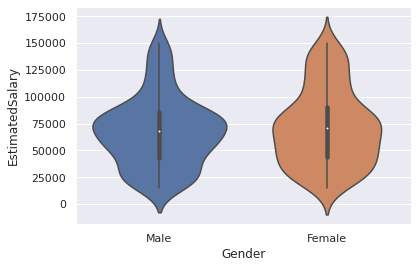

In [35]:
sns.violinplot(x='Gender', y='EstimatedSalary', data=df)
plt.show()

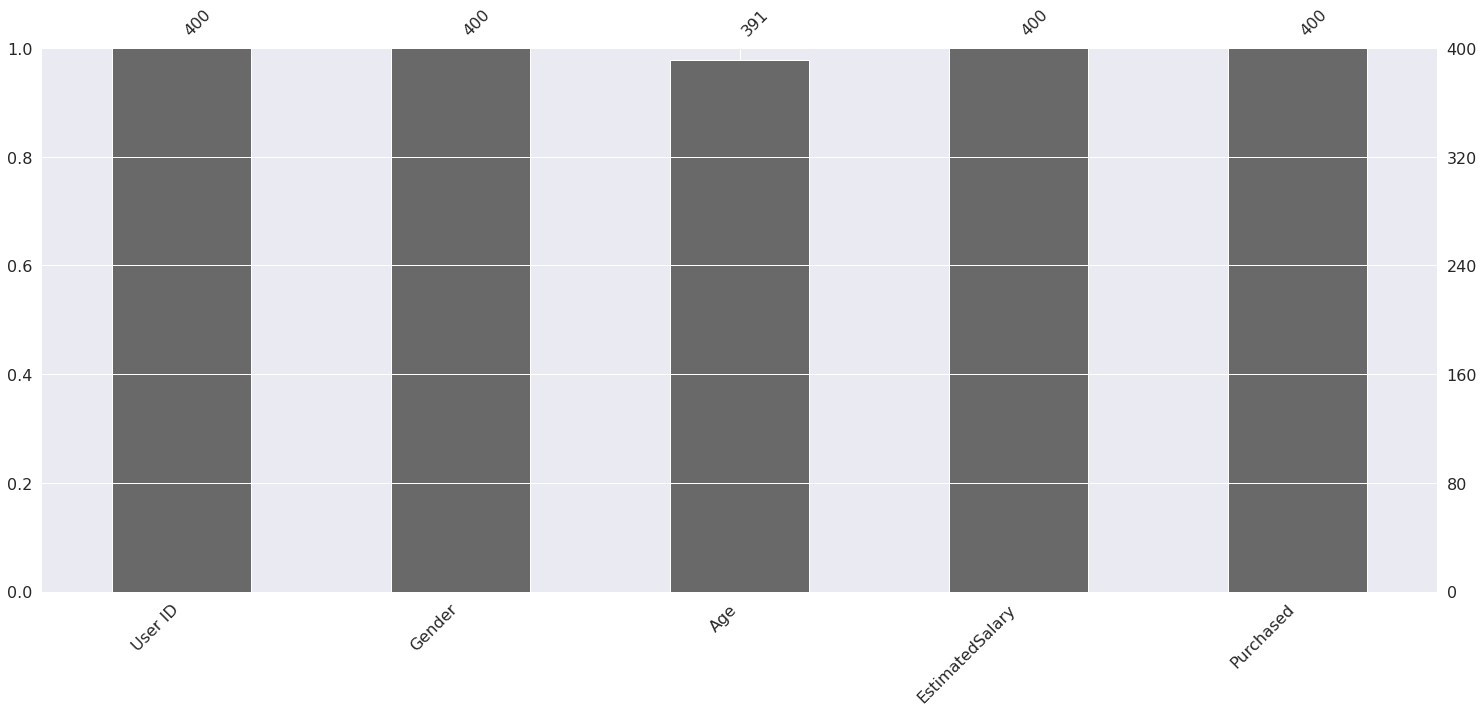

In [36]:
msno.bar(df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PURCHASED')

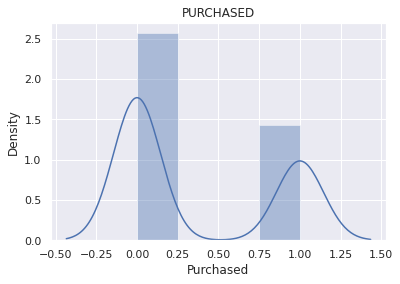

In [37]:
sns.distplot(df['Purchased'])
plt.title("PURCHASED")


In [38]:
df['Gender'][df['Purchased']==0].count()

257

In [39]:
df['Gender'][df['Purchased']==1].count()

143

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


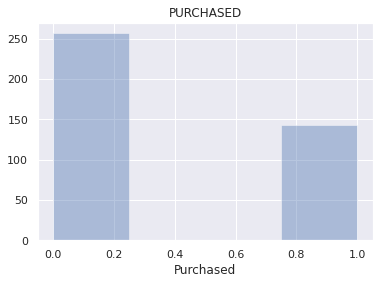

In [40]:
sns.distplot(df['Purchased'],kde=False)
plt.title("PURCHASED")
plt.show()

# **FEATURE ENGINEERING**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


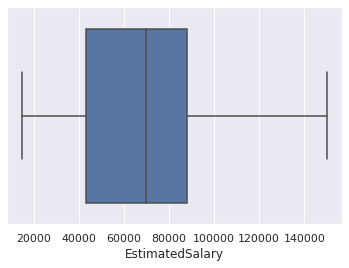

In [41]:
sns.boxplot(df['EstimatedSalary'])

In [42]:
Q1 = np.percentile(df['EstimatedSalary'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['EstimatedSalary'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
upper = np.where(df['EstimatedSalary'] >= (Q3+1.5*IQR))
lower = np.where(df['EstimatedSalary'] <= (Q1-1.5*IQR))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (400, 5)
New Shape:  (400, 5)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


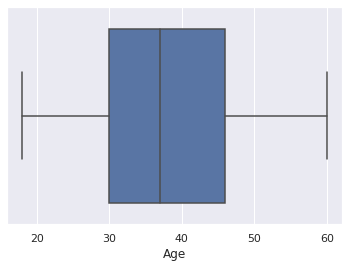

In [43]:
sns.boxplot(df['Age'])

In [44]:
Q1 = np.percentile(df['Age'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['Age'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
upper = np.where(df['Age'] >= (Q3+1.5*IQR))
lower = np.where(df['Age'] <= (Q1-1.5*IQR))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (400, 5)
New Shape:  (400, 5)


## **Since there are no outliers Shape remains same**

In [45]:
k=df.isnull().sum()
k

User ID            0
Gender             0
Age                9
EstimatedSalary    0
Purchased          0
dtype: int64

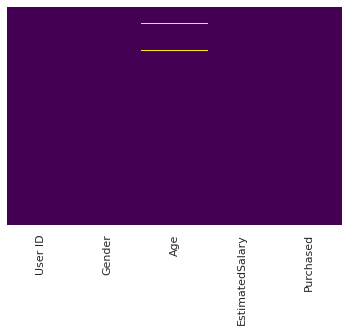

In [46]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## **Filling Empty values by Mean or Median or Mode**

In [47]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

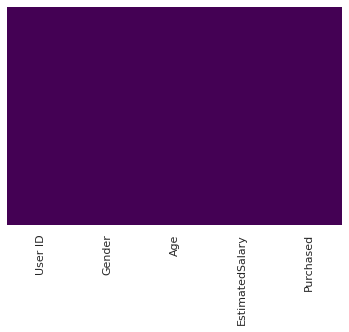

In [48]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## **The empty values are replaced by mean.**

## **ENCODING**

In [49]:

Edf = pd.get_dummies(df, columns = ['Gender'])
Edf

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19.0,19000,0,0,1
1,15810944,35.0,20000,0,0,1
2,15668575,26.0,43000,0,1,0
3,15603246,27.0,57000,0,1,0
4,15804002,19.0,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46.0,41000,1,1,0
396,15706071,51.0,23000,1,0,1
397,15654296,50.0,20000,1,1,0
398,15755018,36.0,33000,0,0,1


In [50]:
a = len(Edf[Edf['Gender_Female'] == 1])
print("Number of Female users:",a)

Number of Female users: 204


In [51]:
b = len(Edf[Edf['Gender_Male'] == 1])
print("Number of Male users:",b)

Number of Male users: 196


# **SPLIT OF DATA**

In [52]:
X=Edf[['Age','EstimatedSalary','Gender_Female','Gender_Male']]
y=df['Purchased']

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

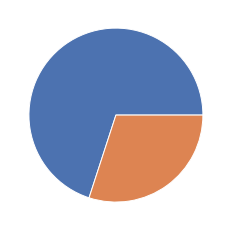

In [54]:
Split=np.array([70,30])
plt.pie(Split)
plt.show() 

# **1. LOGISTIC REGRESSION**

In [55]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(X_train.values,y_train)

LogisticRegression(random_state=0)

## Predicted Values

In [56]:
y_pred = lr.predict(X_test)
y_pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,0
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,0
147,0,0


## Confusion Matrix

In [58]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[80  0]
 [40  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


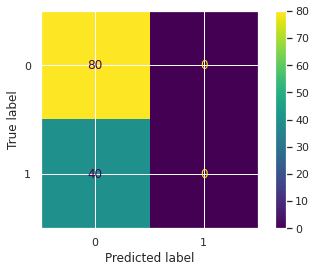

In [59]:
plot_confusion_matrix(lr, X_test, y_test)

## Metrics

In [60]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.0
Sensitivity :  0.0
Specificity :  1.0
F1 score :  0.0
Accuracy :  0.6666666666666666


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
LR = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

# **2. DECISION TREE**

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtree.fit(X_train.values,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicted Values

In [63]:
y_pred = dtree.predict(X_test)
y_pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [64]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,1
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,0
147,0,0


## Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[70 10]
 [ 6 34]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


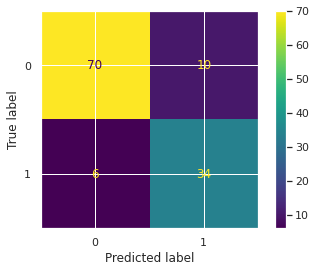

In [66]:
plot_confusion_matrix(dtree, X_test, y_test)

## Decision Tree 

[Text(0.5929878048780488, 0.9583333333333334, 'Age <= 42.5\nentropy = 0.949\nsamples = 280\nvalue = [177, 103]\nclass = 0'),
 Text(0.35365853658536583, 0.875, 'EstimatedSalary <= 89500.0\nentropy = 0.68\nsamples = 200\nvalue = [164, 36]\nclass = 0'),
 Text(0.1951219512195122, 0.7916666666666666, 'Age <= 36.5\nentropy = 0.277\nsamples = 167\nvalue = [159, 8]\nclass = 0'),
 Text(0.17073170731707318, 0.7083333333333334, 'entropy = 0.0\nsamples = 105\nvalue = [105, 0]\nclass = 0'),
 Text(0.21951219512195122, 0.7083333333333334, 'EstimatedSalary <= 72500.0\nentropy = 0.555\nsamples = 62\nvalue = [54, 8]\nclass = 0'),
 Text(0.07317073170731707, 0.625, 'Age <= 37.873\nentropy = 0.262\nsamples = 45\nvalue = [43, 2]\nclass = 0'),
 Text(0.04878048780487805, 0.5416666666666666, 'EstimatedSalary <= 37000.0\nentropy = 0.65\nsamples = 12\nvalue = [10, 2]\nclass = 0'),
 Text(0.024390243902439025, 0.4583333333333333, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 0'),
 Text(0.07317073170731707, 

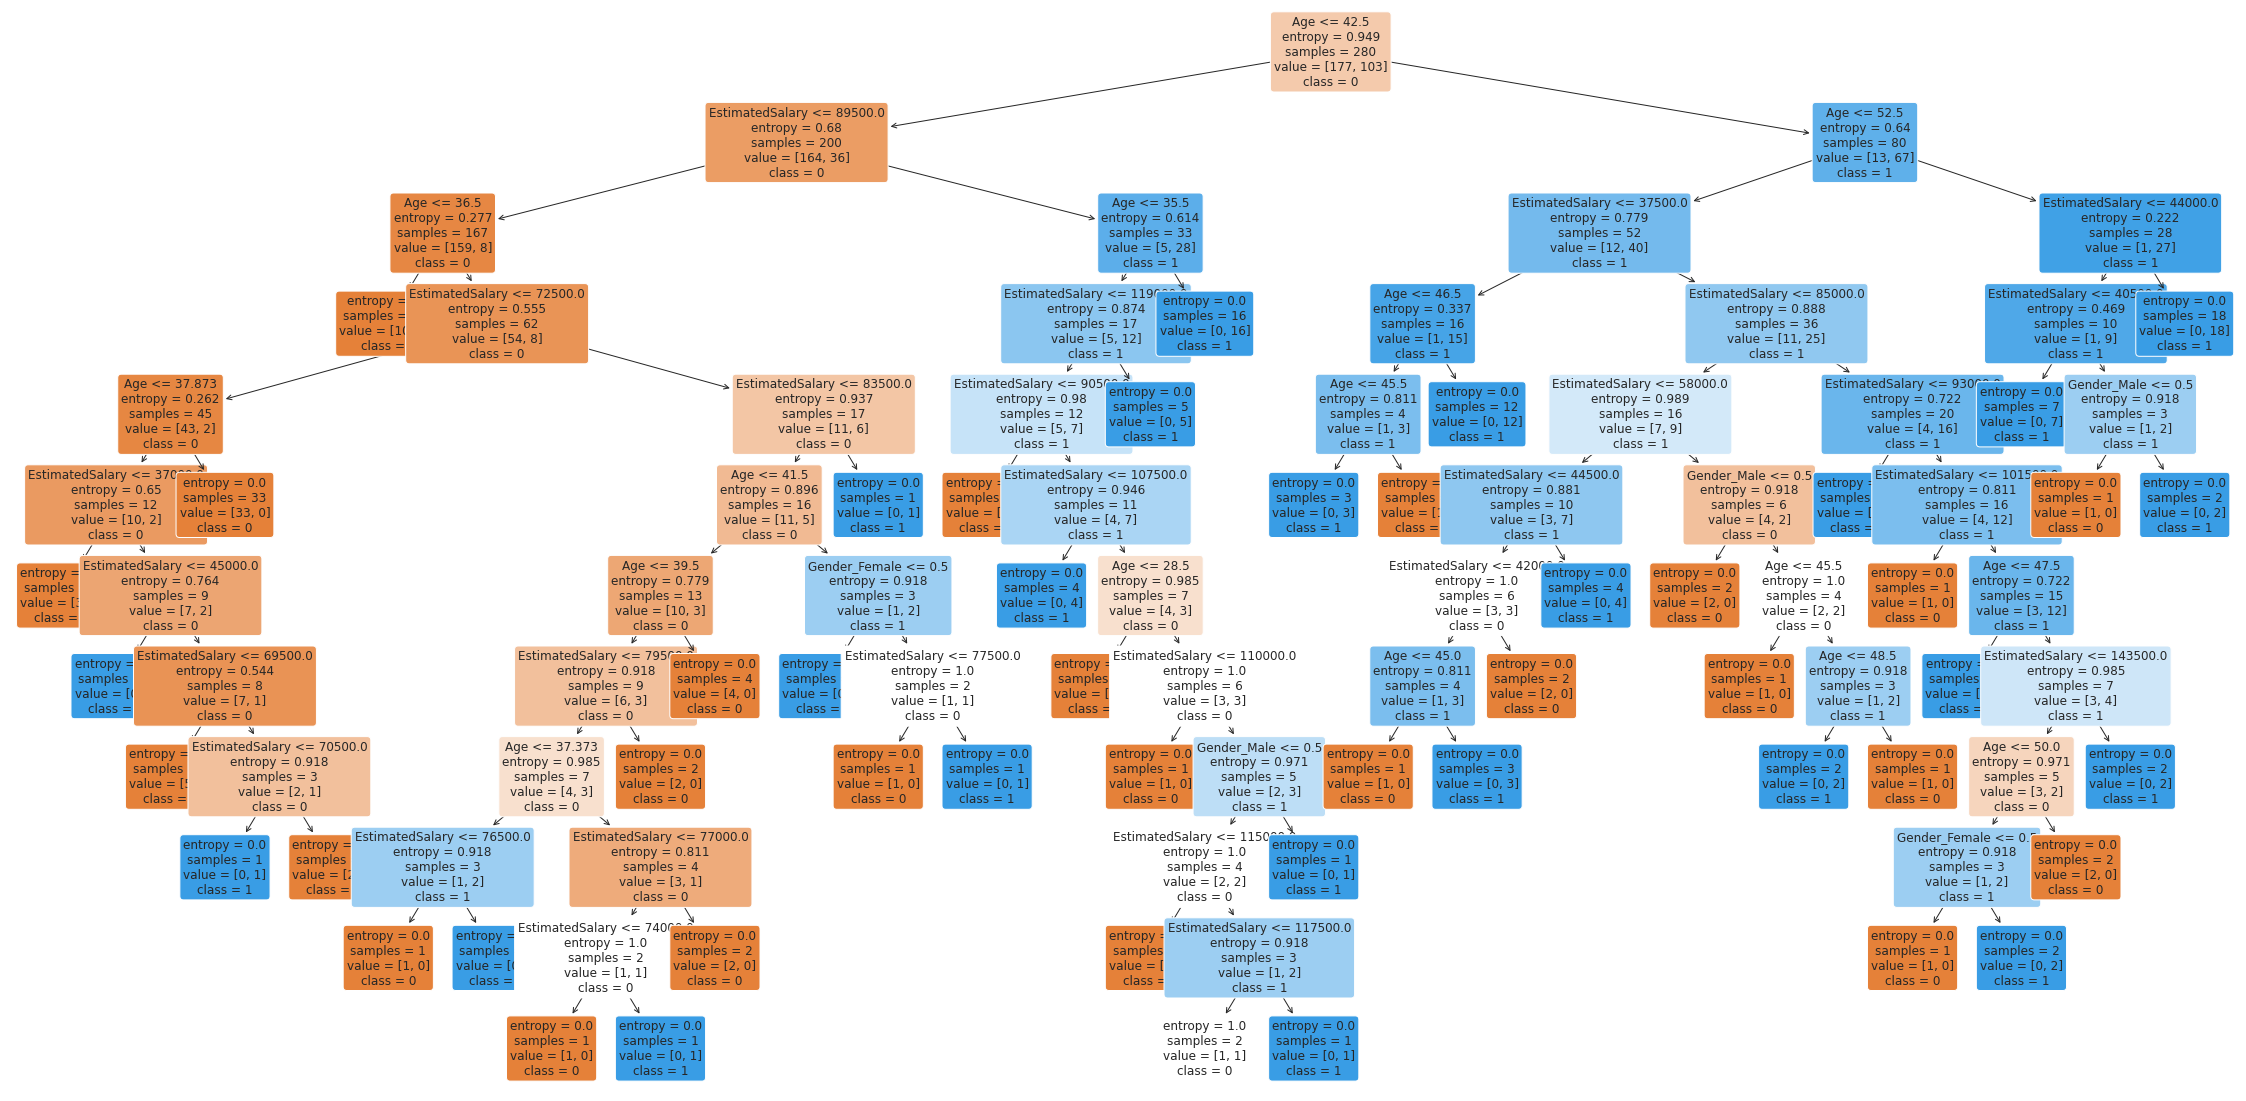

In [67]:
from sklearn import tree
plt.figure(figsize=(40,20))
tree.plot_tree(dtree,class_names=['0','1'],feature_names=X.columns, filled=True,rounded=True,fontsize=12)

## Metrics

In [68]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.7727272727272727
Sensitivity :  0.85
Specificity :  0.875
F1 score :  0.8095238095238095
Accuracy :  0.8666666666666667


In [69]:
DTREE = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

# **3. RANDOM FOREST (No of Trees in the Forest = 2)**

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators=2)
rf1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=2)

## Predicted Values

In [71]:
y_pred = rf1.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [72]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,1
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,0
147,0,0


## Confusion Matrix

In [73]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix)

Confusion Matrix: 
 [[74  6]
 [ 8 32]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


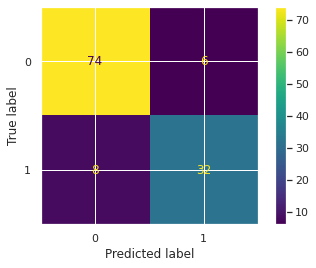

In [74]:
plot_confusion_matrix(rf1, X_test, y_test)

## Metrics

In [75]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.8421052631578947
Sensitivity :  0.8
Specificity :  0.925
F1 score :  0.8205128205128205
Accuracy :  0.8833333333333333


In [76]:
RF1 = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

# **4. RANDOM FOREST (No of Trees in the Forest = 5)**

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(n_estimators=5)
rf2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

## Predicted Values

In [78]:
y_pred = rf2.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [79]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,1
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,0
147,0,0


## Confusion Matrix

In [80]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[73  7]
 [ 5 35]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


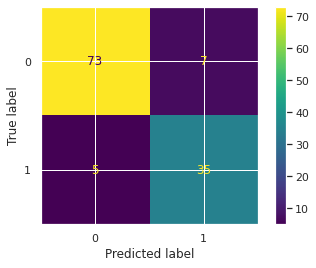

In [81]:
plot_confusion_matrix(rf2, X_test, y_test)

## Metrics

In [82]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.8333333333333334
Sensitivity :  0.875
Specificity :  0.9125
F1 score :  0.8536585365853658
Accuracy :  0.9


In [83]:
RF2 = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

# **5. RANDOM FOREST (No of Trees in the Forest = 10)**

In [84]:
from sklearn.ensemble import RandomForestClassifier

rf3 = RandomForestClassifier(n_estimators=10)
rf3.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

## Predicted Values

In [85]:
y_pred = rf3.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [86]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,1
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,0
147,0,0


## Confusion Matrix

In [87]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[72  8]
 [ 2 38]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


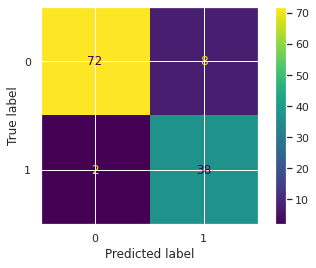

In [88]:
plot_confusion_matrix(rf3, X_test, y_test)

## Metrics

In [89]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.8260869565217391
Sensitivity :  0.95
Specificity :  0.9
F1 score :  0.8837209302325583
Accuracy :  0.9166666666666666


In [90]:
RF3 = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

# **6. RANDOM FOREST (No of Trees in the Forest = 20)**

In [91]:
from sklearn.ensemble import RandomForestClassifier

rf4 = RandomForestClassifier(n_estimators=20)
rf4.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

## Predicted Values

In [92]:
y_pred = rf4.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [93]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,1
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,0
147,0,0


## Confusion Matrix

In [94]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[72  8]
 [ 2 38]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


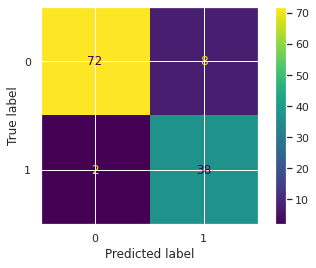

In [95]:
plot_confusion_matrix(rf4, X_test, y_test)

## Metrics

In [96]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.8260869565217391
Sensitivity :  0.95
Specificity :  0.9
F1 score :  0.8837209302325583
Accuracy :  0.9166666666666666


In [97]:
RF4 = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

# **7. Suport Vector Machines**

In [98]:
from sklearn import svm

svc = svm.SVC()
svc.fit(X_train,y_train)

SVC()

## Predicted Values

In [99]:
y_pred = svc.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [100]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,1
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,0
147,0,0


## Confusion Matrix

In [101]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[76  4]
 [22 18]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


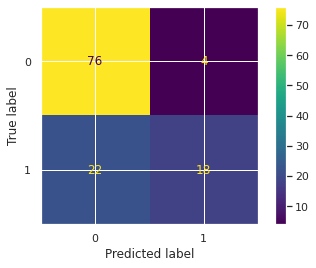

In [102]:
plot_confusion_matrix(svc, X_test, y_test)

## Metrics

In [103]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.8181818181818182
Sensitivity :  0.45
Specificity :  0.95
F1 score :  0.5806451612903226
Accuracy :  0.7833333333333333


In [104]:
SVC = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

# **8. Gaussian Naive Bayes**

In [105]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

## Predicted Values

In [106]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [107]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,1
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,0
147,0,0


## Confusion Matrix

In [108]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[74  6]
 [ 4 36]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


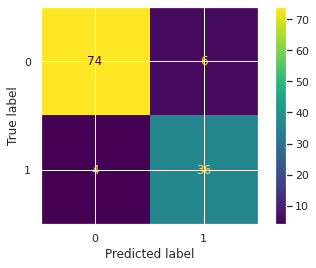

In [109]:
plot_confusion_matrix(gnb, X_test, y_test)

## Metrics

In [110]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.8571428571428571
Sensitivity :  0.9
Specificity :  0.925
F1 score :  0.8780487804878048
Accuracy :  0.9166666666666666


In [111]:
GNB = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

# **9. K- Nearest Neighbours**

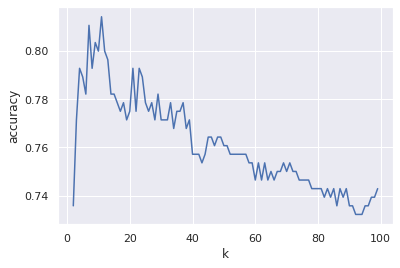

In [112]:
from sklearn.neighbors import KNeighborsClassifier
ks = np.arange(2, 100)
scores = []
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X_train, y_train, cv=5)
    score.mean()
    scores.append(score.mean())

plt.plot(ks,scores)
plt.ylabel('accuracy')
plt.xlabel('k')
plt.show()


### We have maximum accuracy score if value of k is 11.

In [113]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

## Predicted Values

In [114]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1])

In [115]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,1
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,0
147,0,1


## Confusion Matrix

In [116]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[71  9]
 [12 28]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


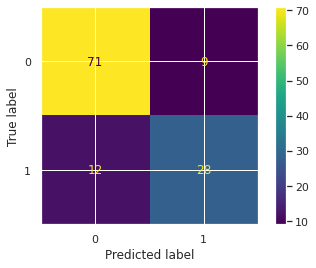

In [117]:
plot_confusion_matrix(knn, X_test, y_test)

## Metrics

In [118]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.7567567567567568
Sensitivity :  0.7
Specificity :  0.8875
F1 score :  0.7272727272727273
Accuracy :  0.825


In [119]:
KNN = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

# **10. K- Means Clustering**

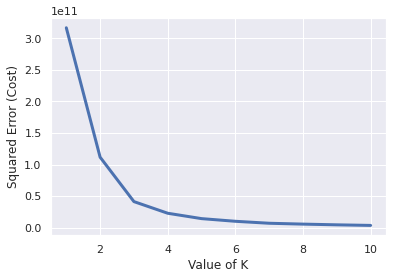

In [120]:
from sklearn.cluster import KMeans
cost =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(X_train)
    cost.append(KM.inertia_)   
plt.plot(range(1, 11), cost, linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show()

### The point at which distortion declines the most is at k = 2.

In [121]:
km = KMeans(n_clusters=2,init="random",random_state=42)
km.fit(X_train)

KMeans(init='random', n_clusters=2, random_state=42)

## Predicted Values

In [122]:
y_pred = km.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int32)

In [123]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,1
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,1
147,0,0


## Confusion Matrix

In [124]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[55 25]
 [14 26]]


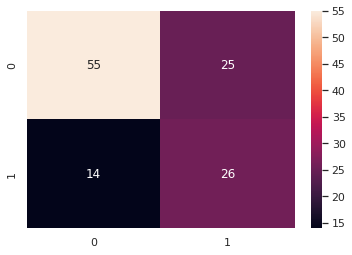

In [125]:
sns.heatmap(confusionmatrix, annot=True, fmt='g')

## Metrics

In [126]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.5098039215686274
Sensitivity :  0.65
Specificity :  0.6875
F1 score :  0.5714285714285715
Accuracy :  0.675


In [127]:
KM = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

# **11. Agglomerative Clustering**

In [128]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
ac.fit(X_train)

AgglomerativeClustering()

## Predicted Values

In [129]:
y_pred = ac.fit_predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [130]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,1
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,0
147,0,0


## Confusion Matrix

In [131]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[76  4]
 [19 21]]


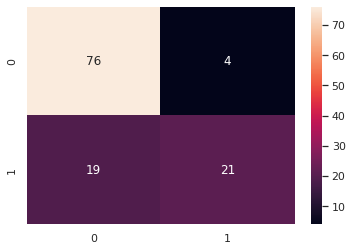

In [132]:
sns.heatmap(confusionmatrix, annot=True, fmt='g')

## Dendogram

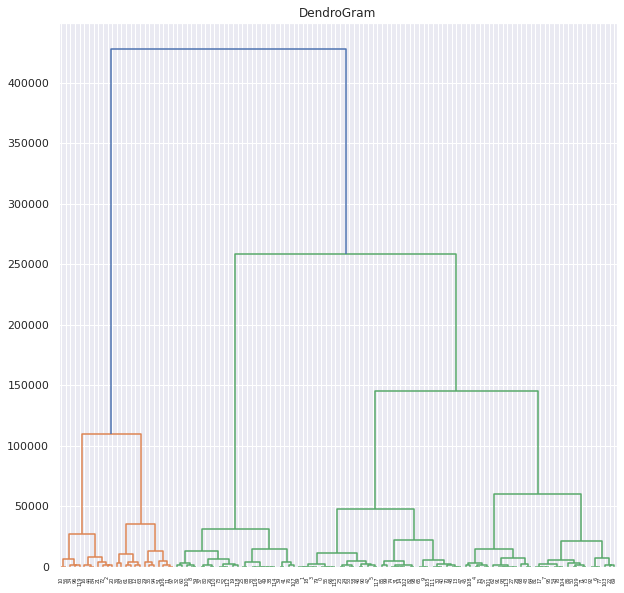

In [133]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,10))
plt.title("DendroGram")
dendo = shc.dendrogram(shc.linkage(X_test,method="ward"))

## Metrics

In [134]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.84
Sensitivity :  0.525
Specificity :  0.95
F1 score :  0.6461538461538462
Accuracy :  0.8083333333333333


In [135]:
AC = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

# **ANALYSIS**

In [136]:
LR.insert(0,"Logistic Regression")
DTREE.insert(0,"Decision Tree")
RF1.insert(0,"Random Forest (No of Trees = 2)")
RF2.insert(0,"Random Forest (No of Trees = 5)")
RF3.insert(0,"Random Forest (No of Trees = 10)")
RF4.insert(0,"Random Forest (No of Trees = 20)")
SVC.insert(0,"Support Vector Machines")
GNB.insert(0,"Gaussian Naive Bayes")
KNN.insert(0,"K- Nearest Neighbours")
KM.insert(0,"K- Means Clustering")
AC.insert(0,"Agglomeartive Clustering")
final = np.array([LR,DTREE,RF1,RF2,RF3,RF4,SVC,GNB,KNN,KM,AC])

In [137]:
analysis = pd.DataFrame(final, columns = ['Model', "Accuracy", "Precision", "Sensitivity_recall", "Specificity", "F1_score"])
analysis.sort_values(by=["Accuracy","F1_score"],ascending=False)

,Model,Accuracy,Precision,Sensitivity_recall,Specificity,F1_score
4,Random Forest (No of Trees = 10),0.9166666666666666,0.8260869565217391,0.95,0.9,0.8837209302325583
5,Random Forest (No of Trees = 20),0.9166666666666666,0.8260869565217391,0.95,0.9,0.8837209302325583
7,Gaussian Naive Bayes,0.9166666666666666,0.8571428571428571,0.9,0.925,0.8780487804878048
3,Random Forest (No of Trees = 5),0.9,0.8333333333333334,0.875,0.9125,0.8536585365853658
2,Random Forest (No of Trees = 2),0.8833333333333333,0.8421052631578947,0.8,0.925,0.8205128205128205
1,Decision Tree,0.8666666666666667,0.7727272727272727,0.85,0.875,0.8095238095238095
8,K- Nearest Neighbours,0.825,0.7567567567567568,0.7,0.8875,0.7272727272727273
10,Agglomeartive Clustering,0.8083333333333333,0.84,0.525,0.95,0.6461538461538462
6,Support Vector Machines,0.7833333333333333,0.8181818181818182,0.45,0.95,0.5806451612903226
9,K- Means Clustering,0.675,0.5098039215686274,0.65,0.6875,0.5714285714285715
